In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [14]:
input_size = 2
output_size = 1
iterations = 200

In [15]:
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))

outputs = tf.matmul(inputs, weights) + biases # tf.matmul() is matrix dot product like np.dot()

In [16]:
#mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
mean_loss = tf.losses.huber_loss(labels = targets, predictions = outputs) # huber_loss is less sensitive to outliers
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

In [17]:
sess = tf.InteractiveSession()
initializer = tf.global_variables_initializer()

sess.run(initializer)

training_data = np.load('TF_intro.npz')
curr_loss = []
w1 = []
w2 = []
b = []


In [18]:
for i in range(iterations):
    
    _, cl, wi, bi = sess.run([optimize, mean_loss, weights, biases], 
        feed_dict={inputs: training_data['inputs'], targets: training_data['targets']})
    
    curr_loss.append(cl)
    w1.append(wi[0][0])
    w2.append(wi[1][0])
    b.append(bi[0]) 
    
    print((cl, wi, bi))

(17.634985, array([[ 0.08736493],
       [-0.14610654]], dtype=float32), array([-0.00345793], dtype=float32))
(16.505911, array([[ 0.19085538],
       [-0.35847768]], dtype=float32), array([ 0.00566751], dtype=float32))
(15.391722, array([[ 0.29722548],
       [-0.56763935]], dtype=float32), array([ 0.01550559], dtype=float32))
(14.29221, array([[ 0.40584037],
       [-0.77395248]], dtype=float32), array([ 0.02602923], dtype=float32))
(13.206406, array([[ 0.51663721],
       [-0.97705102]], dtype=float32), array([ 0.03731009], dtype=float32))
(12.139624, array([[ 0.63053614],
       [-1.17519045]], dtype=float32), array([ 0.04967552], dtype=float32))
(11.099525, array([[ 0.74767828],
       [-1.3672874 ]], dtype=float32), array([ 0.06337558], dtype=float32))
(10.091753, array([[ 0.86667722],
       [-1.55373299]], dtype=float32), array([ 0.07849492], dtype=float32))
(9.1186094, array([[ 0.98675364],
       [-1.73363996]], dtype=float32), array([ 0.09530267], dtype=float32))
(8.190485, 

(1.1680236, array([[ 1.96735549],
       [-3.02528048]], dtype=float32), array([ 3.4063158], dtype=float32))
(1.1223354, array([[ 1.97209513],
       [-3.0232029 ]], dtype=float32), array([ 3.45362401], dtype=float32))
(1.0771859, array([[ 1.97638464],
       [-3.02110744]], dtype=float32), array([ 3.50064206], dtype=float32))
(1.0327253, array([[ 1.97993255],
       [-3.01923203]], dtype=float32), array([ 3.54727268], dtype=float32))
(0.98915291, array([[ 1.98283744],
       [-3.01754022]], dtype=float32), array([ 3.59343815], dtype=float32))
(0.94656825, array([[ 1.98508883],
       [-3.01612496]], dtype=float32), array([ 3.63906574], dtype=float32))
(0.9050675, array([[ 1.98693287],
       [-3.01481295]], dtype=float32), array([ 3.6840992], dtype=float32))
(0.86469924, array([[ 1.98846674],
       [-3.01355052]], dtype=float32), array([ 3.72848153], dtype=float32))
(0.82553458, array([[ 1.98976314],
       [-3.01236582]], dtype=float32), array([ 3.77216339], dtype=float32))
(0.78763

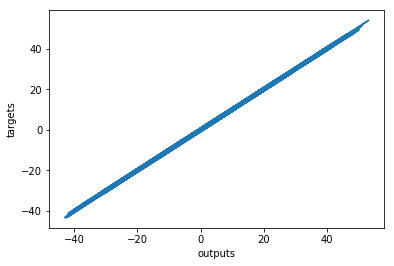

In [19]:
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

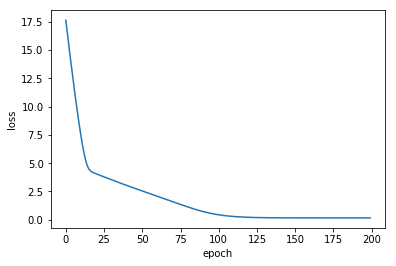

In [20]:
plt.plot(range(iterations), curr_loss) # plotting how loss changes with epochs
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

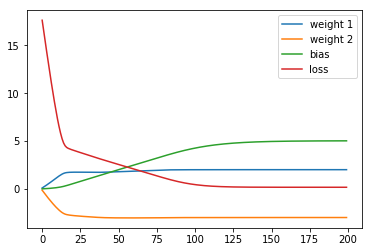

In [21]:
plt.plot(range(iterations), w1, range(iterations), w2, range(iterations), b, range(iterations), curr_loss)
plt.legend(['weight 1', 'weight 2', 'bias', 'loss'])
plt.show()

In [22]:
print((wi, bi))

(array([[ 2.00329447],
       [-3.00146008]], dtype=float32), array([ 5.02040005], dtype=float32))
